# An example of how to average conductivity profiles

There is an issue when calculating the average total resistance, $R_{tot}$, that you aren't actually obtaining the average resistance over the time period. This is due to the fact that currently an average of conductivities, $\sigma$, are being averaged over all times and then calculating a total resistance. The total resistance at any given time is defined as:

$$R_{tot} = \left( \int{\frac{1}{R_{col}} dA} \right)^{-1}$$

where,

$$R_{col} = \int{\frac{1}{\sigma} dz}.$$

## Averaging over time

We would like to average total resistance over time, and would like to maintain information on the average conductivity distribution that leads to this total resistance (i.e. we don't want just the scalar total resistance value)

$$\left< R_{tot} \right> = \frac{\int{ R_{tot} dt }}{T} $$

## An example with two conductivity profiles

Below, we will show an example with two conductivity profiles. The first will be the standard exponential profile, $\sigma = \sigma_0 e^{z/H}$ while the second profile will contain a perturbation (possibly a cloud) that decreases the conductivity by a factor of 1000.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Modify the rcParams to make default figures nicer
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (12, 9)
mpl.rcParams['font.size'] = 16

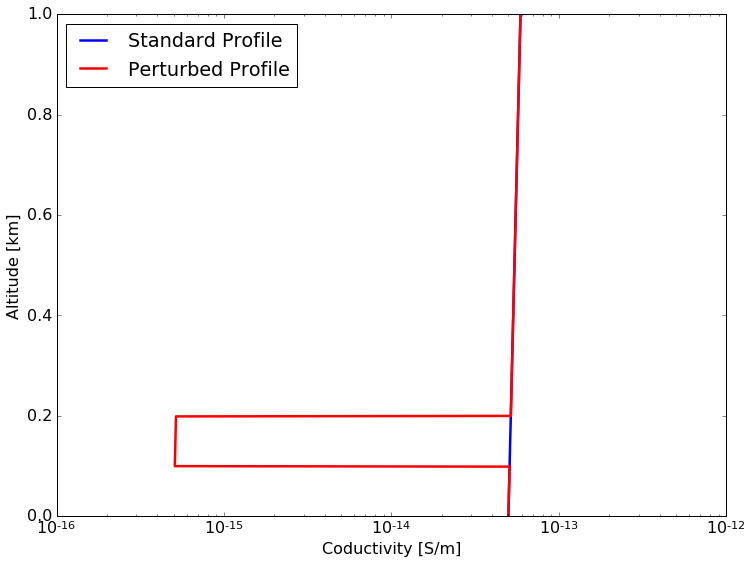

In [2]:
zs = np.linspace(0, 60000, 60000)
sigma0 = 5.e-14
scale_height = 6000

sigma_std = sigma0*np.exp(zs/scale_height)
sigma_pert = sigma_std.copy()
sigma_pert[100:200] /= 100

plt.semilogx(sigma_std, zs/1000, c='b', label='Standard Profile')
plt.semilogx(sigma_pert, zs/1000, c='r', label='Perturbed Profile')

plt.ylim(0, 1)
plt.xlim(1e-16, 1e-12)

plt.xlabel("Coductivity [S/m]")
plt.ylabel("Altitude [km]")

plt.legend(loc='upper left')

Integrate the profiles to obtain the column resistance

In [3]:
R_col_std = np.trapz(1/sigma_std, zs)
R_col_pert = np.trapz(1/sigma_pert, zs)

print("Column Resistance Standard Profile:", R_col_std)
print("Column Resistance Perturbed Profile:", R_col_pert)

Column Resistance Standard Profile: 1.19994552286e+17
Column Resistance Perturbed Profile: 3.13127381959e+17


## Test case

Lets assume that we have two different atmospheres, one filled entirely with the standard profile, the other atmosphere filled with the perturbed profile. The total resistances are now:

In [4]:
R_earth = 6378000 # radius of earth in meters
R_tot_std = 1 / (4*np.pi*R_earth**2 / R_col_std)
R_tot_pert = 1 / (4*np.pi*R_earth**2 / R_col_pert)

print("Total Resistance Standard Profile:", R_tot_std)
print("Total Resistance Perturbed Profile:", R_tot_pert)

Total Resistance Standard Profile: 234.737586956
Total Resistance Perturbed Profile: 612.550858772


Now if we say that half of the year the atmosphere is in the standard profile, and the other half of the year the atmosphere is in the perturbed state. Then we know that the average total resistance for the year is:

In [5]:
print("Average resistance for the year:", (R_tot_std + R_tot_pert)/2)

Average resistance for the year: 423.644222864


### Two different averages

We can either average the conductivity, $\sigma$, over the year, or we can average the resistivity, $\rho = 1/\sigma$, over the year. Lets try both ways and see what the results are.

$$ \sigma_1 = \frac{\sigma_{std} + \sigma_{pert}}{2} $$
$$ \rho_2 = \left( \frac{1}{\sigma_{std}} + \frac{1}{\sigma_{pert}} \right) / 2 $$
$$ \sigma_2 = 1 / \rho_2 $$

In [6]:
sigma1 = (sigma_std + sigma_pert)/2
rho2 = (1/sigma_std + 1/sigma_pert)/2
sigma2 = 1/rho2

Lets see what these two new conductivity profiles look like now.

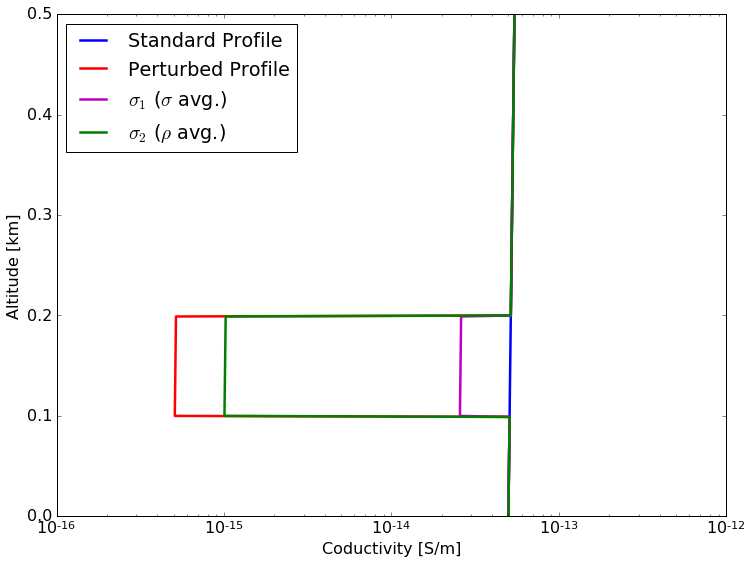

In [7]:
plt.semilogx(sigma_std, zs/1000, c='b', label='Standard Profile')
plt.semilogx(sigma_pert, zs/1000, c='r', label='Perturbed Profile')

plt.semilogx(sigma1, zs/1000, c='m', linestyle='-', label=r'$\sigma_1$ ($\sigma$ avg.)')
plt.semilogx(sigma2, zs/1000, c='g', linestyle='-', label=r'$\sigma_2$ ($\rho$ avg.)')

plt.ylim(0, 0.5)
plt.xlim(1e-16, 1e-12)

plt.xlabel("Coductivity [S/m]")
plt.ylabel("Altitude [km]")

plt.legend(loc='upper left')

The green line above is with the resistivity averaging, which maintains a lot of the perturbation profile. The magenta line is much closer to the standard profile, which doesn't show a lot of deviation due to the perturbations.

Now for the calculation of column resistance with these two average conductivities.

In [8]:
R_col_1 = np.trapz(1/sigma1, zs)
R_col_2 = np.trapz(1/sigma2, zs)

print("Column Resistance conductivity averaging:", R_col_1)
print("Column Resistance resistivity averaging:", R_col_2)

Column Resistance conductivity averaging: 1.21906758521e+17
Column Resistance resistivity averaging: 2.16560967123e+17


Finally, the total resistance average for the year:

In [9]:
R_tot_1 = 1 / (4*np.pi*R_earth**2 / R_col_1)
R_tot_2 = 1 / (4*np.pi*R_earth**2 / R_col_2)

print("Total Resistance with conductivity averaging:", R_tot_1)
print("Total Resistance with resisitivity averaging:", R_tot_2)
print("")
print("Actual average resistance:", (R_tot_std + R_tot_pert)/2)

Total Resistance with conductivity averaging: 238.47831242
Total Resistance with resisitivity averaging: 423.644222864

Actual average resistance: 423.644222864


## Conclusion

Computing a yearly average resistivity is needed to calculate a yearly average total resistance. This is due to the difference between arithmetic means and harmonic means, and how we are calculating column resistance from an integrated reciprocal value $R_{col} = \int{\frac{dz}{\sigma}}$. In the future when reporting yearly average profiles, the yearly averages should be done over resistivity rather than conductivity.